# Day 8

# Intro to Machine Learning  

What is Machine Learning?

It is a branch of artificial intelligence based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention.


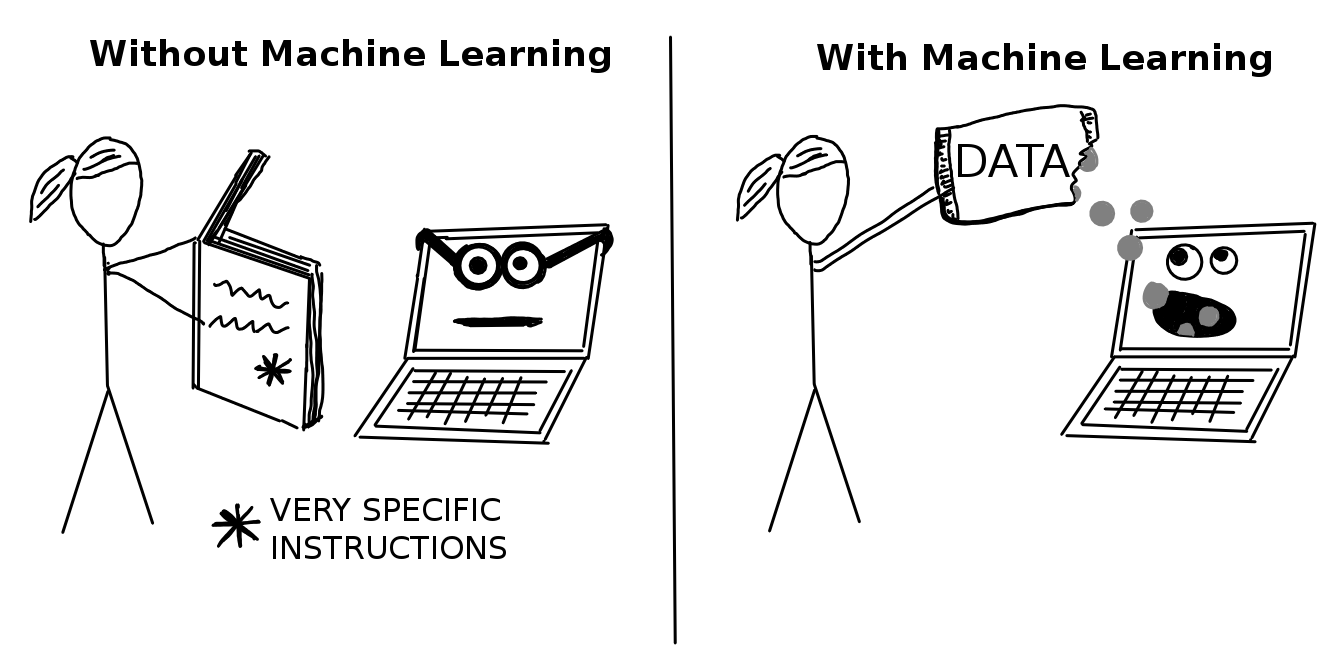

# Examples of Machine Learning

Speech recognition

- Speech-to-text
- Process human speech into a written format
- Example: Siri


Bots
- Online chatbots that answer (FAQs)
- Detect content on social media


Computer Vision
- Derive meaningful information from digital images, videos and other visual inputs
- Understanding what iis going on in the images
- Driverless cars & trucks

Recommendation Systems
- Using past consumption behavior data to suggest products
- AI algorithms can help to discover data trends 

Automated Stock Trading
- Designed to optimze portfolios


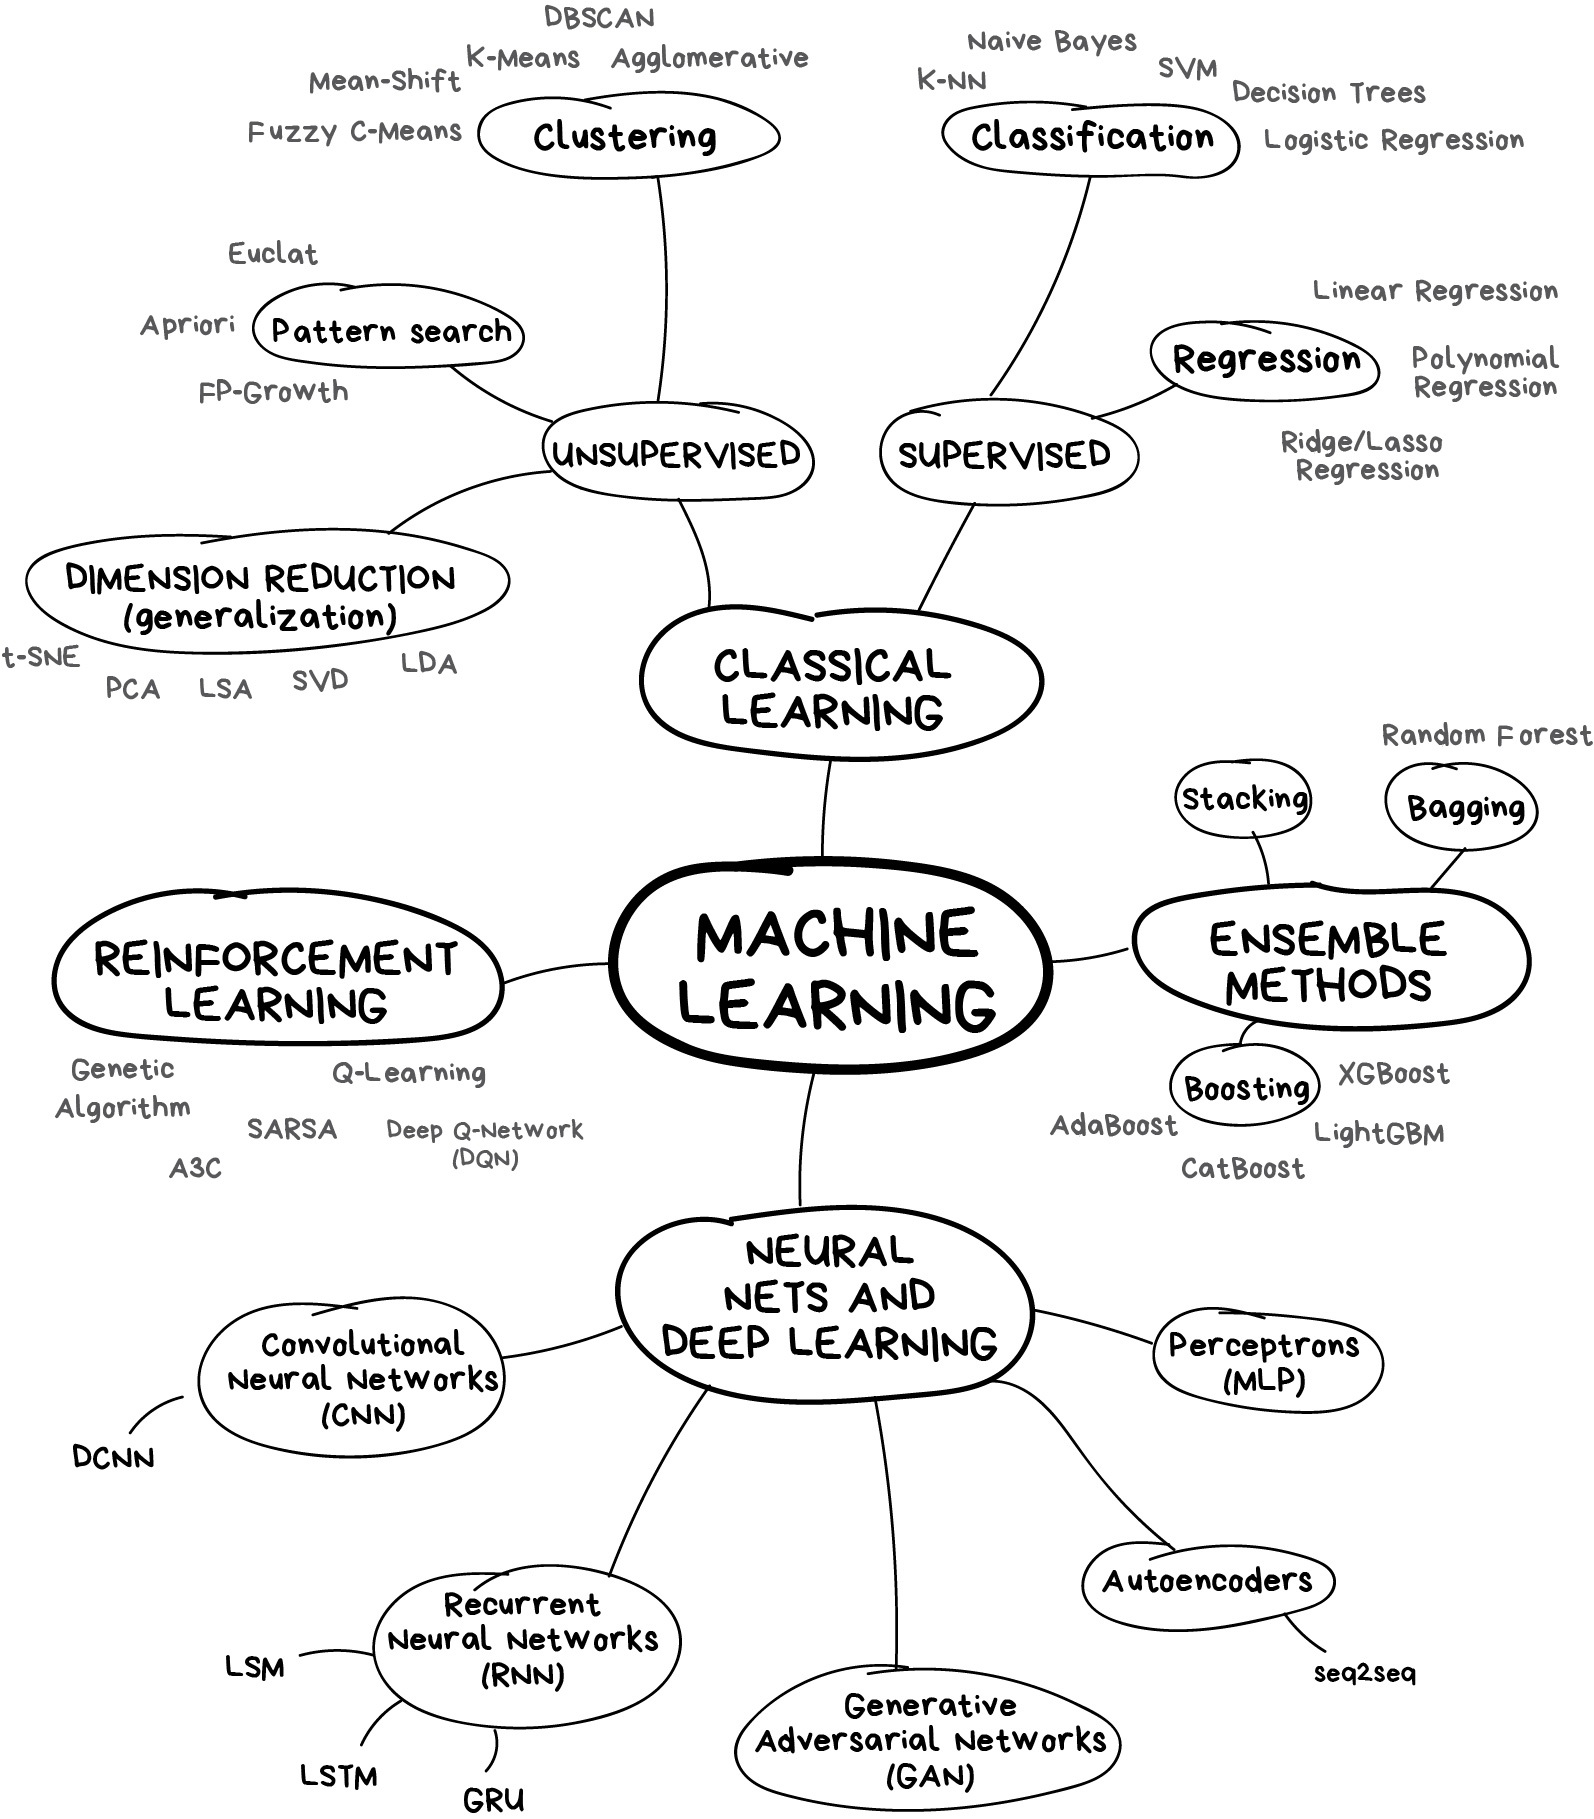

# Intro to k-Nearest Neighbors


What is it?

kNN works by memorizing the training examples/data points the algorithm is going to identify the closest neighbors in terms of distance

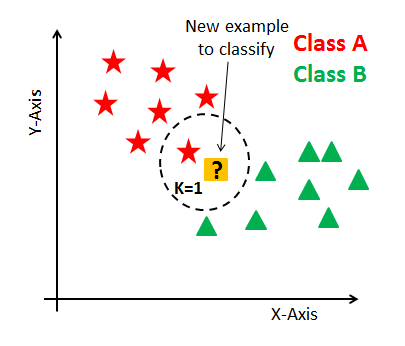

# How do we determine which points are closer?

Answer: Distance Formula!

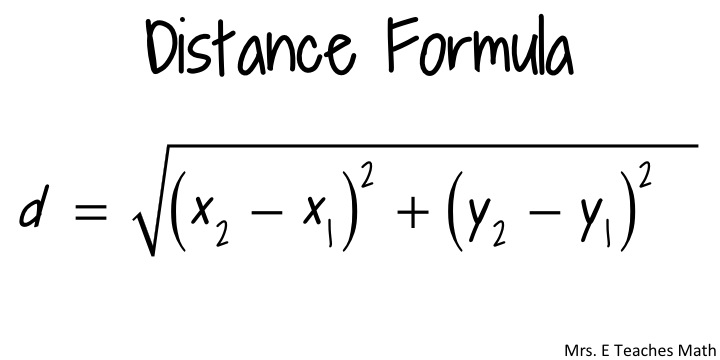

# Machine Learning Process

## 1. Load the Dataset

In [1]:
import pandas as pd

In [2]:
fruits = pd.read_csv("fruits_data.csv")

In [3]:
fruits = fruits[['weight', 'width', 'height', 'fruit']]

In [4]:
fruits.head()

,weight,width,height,fruit
0,5.1,2.625,2.375,apple
1,7.6,3.000,3.250,apple
2,5.0,2.500,3.000,apple
3,7.4,9.500,3.250,apple
4,7.4,3.400,3.100,apple


## 2. Explore the data with visualizations

In [5]:
import plotly.express as px

In [11]:
fig = px.scatter(fruits, x="width", y="height", size="weight", color="fruit",
                 color_discrete_sequence = ["#e63c30", "#e6be30", "#f09218"],
                 labels={"width" : "Width", "height" : "Height"},
                 title = "Fruits Dataset", size_max = 15)

fig.show()

## 3. Split the data for training and testing 

In [13]:
from sklearn.utils import shuffle
# To shuffle: shuffle(df)

In [15]:
fruits = shuffle(fruits)

In [16]:
training_data = fruits[:20]
testing_data = fruits[20:]

In [17]:
training_data

,weight,width,height,fruit
13,5.00,1.50,6.000,banana
25,8.20,2.50,2.500,orange
14,5.20,1.40,6.100,banana
1,7.60,3.00,3.250,apple
15,6.10,1.75,8.000,banana
30,3.00,4.60,3.800,orange
23,5.00,3.65,3.150,orange
6,6.70,2.80,3.170,apple
4,7.40,3.40,3.100,apple
29,10.60,3.00,3.500,orange


In [18]:
testing_data

,weight,width,height,fruit
19,5.1,2.000,7.500,banana
28,4.7,2.750,2.500,orange
18,6.1,5.250,7.500,banana
5,7.6,2.750,3.250,apple
21,8.7,2.800,3.250,orange
0,5.1,2.625,2.375,apple
11,6.2,5.000,7.500,banana
27,9.4,2.600,1.900,orange
26,8.9,3.000,2.500,orange
20,6.0,3.500,4.000,orange


## 4. Create the Model

In [35]:
def distance(P1, P2):
    """ Find the distances between two points """
    sdist = 0
    for point1, point2 in zip(P1, P2):
      sdist += (point2 - point1) ** 2
    return sdist ** 0.5

In [36]:
def find_min(distances):
  """ Find the class of the closest point """
  predicted_class = ""
  smallest_dist = 10000000
  for dist, name in distances:
    if dist < smallest_dist:
      smallest_dist = dist
      predicted_class = name
  return predicted_class

In [43]:
def knn():
  predictions = []
  for index in testing_data.index:
    distances = []
    test_point = list(testing_data.loc[index][:-1])
    for index2 in training_data.index:
      train_point = list(training_data.loc[index2][:-1])
      dist = distance(test_point, train_point)
      distances.append((dist, training_data.at[index2, "fruit"]))
    min_class = find_min(distances)
    predictions.append(min_class)
  return predictions

In [21]:
for index in testing_data.index:
  print(index)
  print(list(testing_data.loc[index][:-1]))

19
[5.1, 2.0, 7.5]
28
[4.7, 2.75, 2.5]
18
[6.1, 5.25, 7.5]
5
[7.6, 2.75, 3.25]
21
[8.7, 2.8, 3.25]
0
[5.1, 2.625, 2.375]
11
[6.2, 5.0, 7.5]
27
[9.4, 2.6, 1.9]
26
[8.9, 3.0, 2.5]
20
[6.0, 3.5, 4.0]
3
[7.4, 9.5, 3.25]


## 5. Make Predictions on the Unseen Data

In [44]:
predicted = knn()

In [45]:
predicted

['banana',
 'apple',
 'banana',
 'apple',
 'orange',
 'apple',
 'banana',
 'orange',
 'orange',
 'apple',
 'apple']

In [46]:
testing_data["fruit"]

19    banana
28    orange
18    banana
5      apple
21    orange
0      apple
11    banana
27    orange
26    orange
20    orange
3      apple
Name: fruit, dtype: object

## 6. Evaluate the Accuracy

In [47]:
for predict, actual in zip(predicted, testing_data["fruit"]):
  if predict == actual:
    print(f"{predict} correctly identified")
  else:
    print(f"Incorrectly identified - {actual} was predicted as {predict}")

banana correctly identified
Incorrectly identified - orange was predicted as apple
banana correctly identified
apple correctly identified
orange correctly identified
apple correctly identified
banana correctly identified
orange correctly identified
orange correctly identified
Incorrectly identified - orange was predicted as apple
apple correctly identified


## kNN using scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# create features

In [ ]:
# create target

In [ ]:
# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 3000)

In [ ]:
# select a classifier
knn = KNeighborsClassifier()

In [ ]:
# Create a model by fitting the training data
knn.fit(X = X_train, y = y_train)

In [ ]:
# Make predictions on the test set
predicted = knn.predict(X = X_test)

In [ ]:
# Prediction Accuracy
accuracy = knn.score(X_test, y_test)
print(f'Prediction accuracy on the test data: {accuracy * 100}')